In [ ]:
'''
第5章 Logistic回归

Logistic 回归 或者叫逻辑回归 虽然名字有回归，但是它是用来做分类的。经典的二分类。
其主要思想是: 根据现有数据对分类边界线(Decision Boundary)建立回归公式，以此进行分类。

例如：y = w0 + w1x1 + w2x2 + ... + wnxn
梯度：参考上图的例子，二维图像，x方向代表第一个系数，也就是 w1，y方向代表第二个系数也就是 w2，这样的向量就是梯度。
α：上面的梯度算法的迭代公式中的阿尔法，这个代表的是移动步长（step length）。移动步长会影响最终结果的拟合程度，最好的方法就是随着迭代次数更改移动步长。
步长通俗的理解，100米，如果我一步走10米，我需要走10步；如果一步走20米，我只需要走5步。这里的一步走多少米就是步长的意思。
▽f(w)：代表沿着梯度变化的方向。

'''

In [ ]:
'''sigmoid函数'''

In [3]:
import numpy as np
import matplotlib.pyplot as plt
'''
参数t可以为数也可以为向量，使用numpy计算
'''
def sigmoid(t):
    return(1/(1+np.exp(-t)))

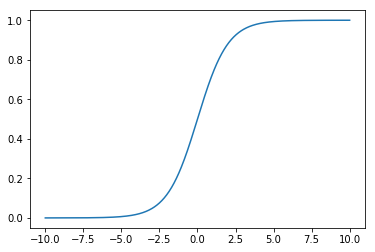

In [2]:
'''
选取x范围：-10到10之间，选取500个点

'''
x = np.linspace(-10,10,500)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

# 实现逻辑回归


In [9]:
from sklearn import datasets
# 导入鸢尾花数据集
iris = datasets.load_iris()

In [10]:
'''
大写 X
'''
X = iris.data
y = iris.target

In [11]:
'''
逻辑回归针对二分类
iris数据集中有三类数据，所以要提取两类出来进行训练

1.只取出类别标签y小于2的样本集:即取出类别0,1作为二分类
2.为了平面画图说明，只取出前两个特征。取出两个特征可以作图展示
'''

X = X[y<2,:2]
y = y[y<2]
# 特征集：100个样本，每个样本有2个特征
X.shape

(100, 2)

In [12]:
# 类别标签集：100个样本对应的类别
y.shape

(100,)

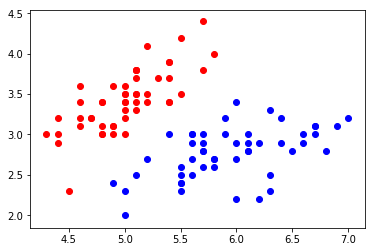

In [84]:
'''
绘制样本类型y=0与y=1的两个样本特征在二维平面的坐标
'''
import matplotlib.pyplot as plt

# y=0的红色
plt.scatter(X[y==0,0],X[y==0,1],color='red')
# y=1的蓝色
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [85]:
print(X[ y>0,0])

[ 7.   6.4  6.9  5.5  6.5  5.7  6.3  4.9  6.6  5.2  5.   5.9  6.   6.1  5.6
  6.7  5.6  5.8  6.2  5.6  5.9  6.1  6.3  6.1  6.4  6.6  6.8  6.7  6.   5.7
  5.5  5.5  5.8  6.   5.4  6.   6.7  6.3  5.6  5.5  5.5  6.1  5.8  5.   5.6
  5.7  5.7  6.2  5.1  5.7]


In [86]:
print(X[y==1,0])

[ 7.   6.4  6.9  5.5  6.5  5.7  6.3  4.9  6.6  5.2  5.   5.9  6.   6.1  5.6
  6.7  5.6  5.8  6.2  5.6  5.9  6.1  6.3  6.1  6.4  6.6  6.8  6.7  6.   5.7
  5.5  5.5  5.8  6.   5.4  6.   6.7  6.3  5.6  5.5  5.5  6.1  5.8  5.   5.6
  5.7  5.7  6.2  5.1  5.7]


In [22]:
print(X[y==0,1])

[ 3.5  3.   3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  3.7  3.4  3.   3.   4.
  4.4  3.9  3.5  3.8  3.8  3.4  3.7  3.6  3.3  3.4  3.   3.4  3.5  3.4  3.2
  3.1  3.4  4.1  4.2  3.1  3.2  3.5  3.1  3.   3.4  3.5  2.3  3.2  3.5  3.8
  3.   3.8  3.2  3.7  3.3]


In [ ]:
# 使用逻辑回归，自己编写的方法

In [90]:
from playML.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,seed=666)

In [88]:
'''
训练LogisticRegression
'''
from LogisticRegression import LogisticRegression
# LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [16]:
'''
测试数据,所有测试数据分类正确率
'''
log_reg.score(x_test,y_test)

1.0

In [17]:
'''
逻辑回归改自线性回归， 逻辑回归的系数的求解结果：θ1，θ2
'''
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [18]:
'''
逻辑回归的截距：θ0
'''
log_reg.intercept_

-0.69377192729112258

In [24]:
'''
定义分类边界的直线:  θ0+θ1x1+θ2x2 = 0 直线

一旦传来x1，计算x2
'''
def x2(x1):
    return (-log_reg.coef_[0]*x1 - log_reg.intercept_) / log_reg.coef_[1]

In [25]:
'''
观察，计算机是怎么绘制函数图像的：
函数基本的是x2=f(x1)
1.首先要定义x1的取值范围，然后随机的在取值范围中取出若干个点，如取出1000个点
2.将x1的1000个点值带入f函数进行计算得到对应1000个x2值
3.将x1，x2值作为一个点(x1,x2)绘制在平面坐标系中

'''

'''
设置特征1：x1_plot在一个区间内，均匀的取值

观察上面的作图：发现，x1整体分布范围在(4,8区间内),取1000个点
'''
import numpy as np
x1_plot = np.linspace(4,8,1000)

'''
设置特征2的取字点
'''
x2_plot = x2(x1_plot)

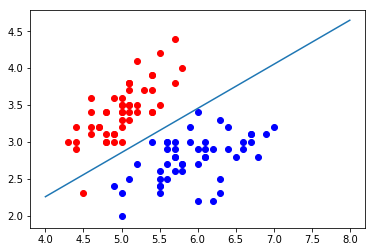

In [26]:
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.plot(x1_plot,x2_plot)
plt.show()

'''
几何意义：定义分类边界的直线 θ0+θ1x1+θ2x2 = 0 

判断测试数据点，是落在直线的上面还是下面

    1.当特征点与θ值相乘>=0，则分类为1，即在直线下方（其实=0的时候，即类别1，类别0概率都为0.5）
    2.当特征点与θ值相乘<0， 则分类为0，即在直线上方
'''

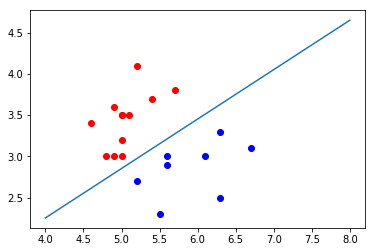

In [27]:
'''
测试集数据分类：100%=1 正确率
'''
plt.scatter(x_test[y_test==0,0],x_test[y_test==0,1],color='red')
plt.scatter(x_test[y_test==1,0],x_test[y_test==1,1],color='blue')
plt.plot(x1_plot,x2_plot)
plt.show()

# 不规则的决策边界的绘制方法
# 可视化工具：绘图模块

In [81]:
'''
绘图模块
参数：
 model：训练好的model
 axis：需要绘制的区域，坐标轴的范围，对应4个元素，分别是x轴和y轴的范围
'''
import numpy as np
#将x轴、y轴划分为无数小点，最大值-最小值 再乘以 100
def plot_decision_boundary(model,axis):#绘图模块
    x0,x1 = np.meshgrid(  
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth =5,cmap=custom_cmap)

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


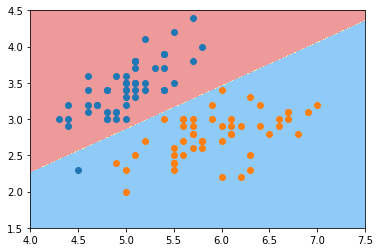

In [82]:
plot_decision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

# KNN的决策边界 
# 二分类与多分类

In [91]:
'''
knn中没有决策边界表达式，但是仍然可以通过这种方式进行绘制
'''
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [92]:
knn_clf.score(x_test,y_test)

1.0

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


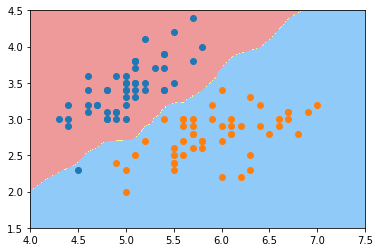

In [94]:
'''
1.knn二分类
带入knn算法模型，绘制knn模型边界
此时训练数据采用的是二分类数据：knn其实可以多分类
'''
plot_decision_boundary(knn_clf,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [ ]:
'''
2.knn多分类
knn多分类，绘制图形:非常不规则的边界
对鸢尾花数据集3个分类，进行分类
'''


In [106]:

def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)




In [107]:
'''
1.iris数据集中有三类数据，所以要全部类别提取，三类出来进行训练
2.为了平面画图说明，只取出前两个特征。取出两个特征可以作图展示
'''

knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


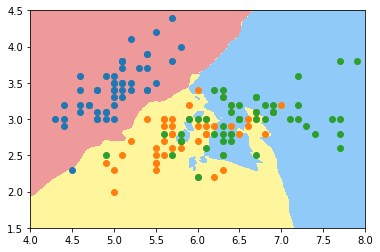

In [110]:
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()
'''
k近邻k=5的时候，容易发生过拟合，图像分割出现复杂嵌套边界
'''

In [115]:
'''
将k近邻的k改写为50，决策边界平整许多，分割清洗，
k的值越小，模型就越负责，即决策边界整体分布越复杂，不清晰，容易发生过拟合
k的值越大，模型就越简单，即决策边界整体分布越规整，越清晰，解决过拟合
'''
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


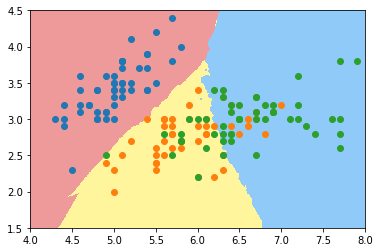

In [116]:
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()

In [35]:
'''
将x_test进行预测概率
'''
log_reg.predict_proba(x_test)

array([ 0.92972035,  0.98664939,  0.14852024,  0.17601199,  0.0369836 ,
        0.0186637 ,  0.04936918,  0.99669244,  0.97993941,  0.74524655,
        0.04473194,  0.00339285,  0.26131273,  0.0369836 ,  0.84192923,
        0.79892262,  0.82890209,  0.32358166,  0.06535323,  0.20735334])

In [37]:
log_reg.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [36]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## 逻辑回归添加多项式特征，实现非线性划分

### 在逻辑回归中添加多项式项，使得可以生成不规则的决策边界
### 对非线性数据进行分类，模型会变复杂，会产生过拟合问题

In [118]:
'''
在逻辑回归添加多项式特征项，实现非线性划分
'''
import numpy as np
import matplotlib.pyplot as plt
'''
随机生成样本数据：
设置随机种子
'''
np.random.seed(666)
'''
生成x:均值为0，标准差为1的随机序列
size：生成200个样本，每个样本有2个特征
'''
X = np.random.normal(0,1,size=(200,2))
'''
y=X的第一个特征x0的平方+X的第二个特征x1的平方
半径<1.5令y=1;半径>=1.5令y=0
y的结果是blooean值，套进np.array转化，设置dtype='int'
'''
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5,dtype = 'int')

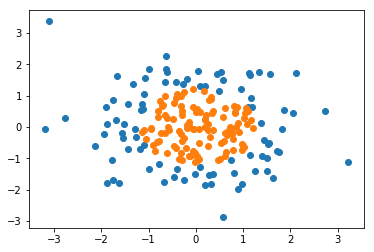

In [119]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [120]:
proba = 0.7
np.array(proba >= 0.5, dtype='int')

array(1)

In [121]:
from LogisticRegression import LogisticRegression

In [122]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [123]:
'''
分类准确度只有0.6
'''
log_reg.score(X,y)

0.60499999999999998

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


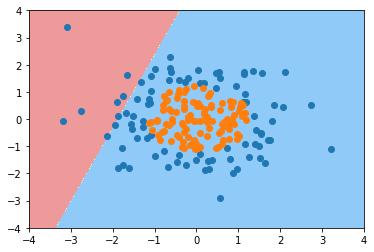

In [124]:
'''
绘制决策边界：可视化分类结果，直观理解分类
'''
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
'''
画出对应的坐标点
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
'''
显然分类出现大部分错误，准确率只有0.6
'''

In [125]:
'''
创建为逻辑回归算法，添加多项式项的管道
使用sklearn管道
'''
from sklearn.pipeline import Pipeline
# 添加多项式
from sklearn.preprocessing import PolynomialFeatures
#归一化
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        #poly字符串描述函数功能，添加多项式实例化PolynomialFeatures对象
        ('poly',PolynomialFeatures(degree=degree)),
        #归一化
        ('std_scaler',StandardScaler()),
        '''
        LogisticRegression为自定义实现的类，可以传到sklearn管道函数中
        因为，自定义函数遵循了sklearn模块定义标准，要有构造函数，fit函数，predict函数，score函数
        可以无缝连接
        '''
        ('log_reg',LogisticRegression())
    ])

In [126]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [130]:
#查看分类准确度
poly_log_reg.score(X,y)

0.94999999999999996

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


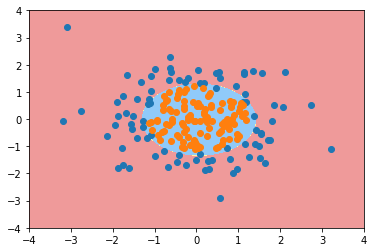

In [133]:
'''
决策边界为圆形，对非线性进行划分
绘制决策边界：可视化分类结果，直观理解分类
'''
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
'''
画出对应的坐标点
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [137]:
'''
degree控制多项式最高次数
degree取值20的情况下
会出现过拟合，多项式的阶数如果越大，模型会越复杂，
如图外围会出现其他边界
防止过拟合：
1.简化模型，减小阶数degree
2.对模型进行正则化
'''
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


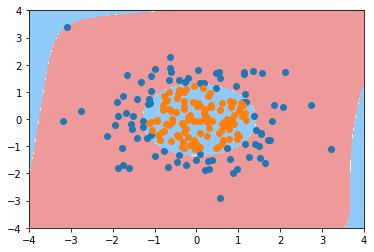

In [138]:
'''
决策边界为圆形，对非线性进行划分
绘制决策边界：可视化分类结果，直观理解分类
'''
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
'''
画出对应的坐标点
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 逻辑回归中使用正则化：对损失函数添加新的项

### 在逻辑回归中添加多项式项，使得可以生成不规则的决策边界
### 对非线性数据进行分类，模型会变复杂，会产生过拟合问题

In [140]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
'''
生成测试用例，均值为0，标准差为1，的随机数200个，每个样本两个特征
'''
X = np.random.normal(0,1,size=(200,2))
'''
x的第一个特征x0^2与第二个特征x1 组成一个抛物线
分布特点：布尔向量，ture1，false0
'''
y = np.array(X[:,0]**2 + X[:,1]<1.5,dtype='int')
'''
随机20个点，强制置为1，即添加噪音
'''
for _ in range(20):
    y[np.random.randint(200)] = 1
    

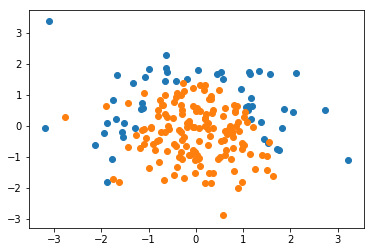

In [141]:
'''
查看随机生成的测试用例：
橙色点的在抛物线下方，而且还包含一定的噪音
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [142]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [ ]:
'''
使用scikit-learn中的逻辑回归
'''

In [143]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
'''
逻辑回归参数：
 penalty='l2' 默认使用L2正则项，参数进行正则化
 C=1.0 默认超参数c=1
'''

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
'''
逻辑回归，默认二分类的线性分类：0.79 效果一般般
'''
log_reg.score(X_train,y_train)

0.79333333333333333

In [145]:
'''
测试集上进行测试效果
'''
log_reg.score(X_test,y_test)

0.85999999999999999

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


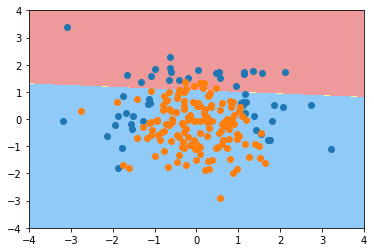

In [146]:
'''
可视化决策边界
'''
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
'''
绘制出样本点的坐标
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

'''
默认二分类的线性分类,得到的直线分类边界
'''

In [151]:
'''
***********
1.使用多项式项进行逻辑回归
***********
'''
'''
创建为逻辑回归算法，添加多项式项的管道
使用sklearn管道
'''
from sklearn.pipeline import Pipeline
# 添加多项式
from sklearn.preprocessing import PolynomialFeatures
#归一化
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        #poly字符串描述函数功能，添加多项式实例化PolynomialFeatures对象
        ('poly',PolynomialFeatures(degree=degree)),
        #归一化
        ('std_scaler',StandardScaler()),
        
#         LogisticRegression为自定义实现的类，可以传到sklearn管道函数中
#         因为，自定义函数遵循了sklearn模块定义标准，要有构造函数，fit函数，predict函数，score函数
#         可以无缝连接
        
        ('log_reg',LogisticRegression())
    ])

In [152]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train,y_train)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [153]:
'''
训练集数据测试准确度
'''
poly_log_reg.score(X_train,y_train)

0.91333333333333333

In [154]:
'''
测试集数据测试准确度
'''
poly_log_reg.score(X_test,y_test)

0.93999999999999995

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


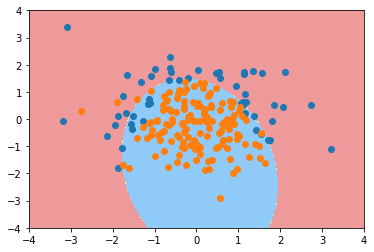

In [156]:
'''
可视化决策边界
'''
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
'''
绘制出样本点的坐标
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [157]:
'''
2.提高多项式项的阶数到20

'''
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train,y_train)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [160]:
'''
训练集测试准确度：训练集准确度上升
'''
poly_log_reg2.score(X_train,y_train)

0.93999999999999995

In [161]:
'''
测试集测试准确度：测试集准确度下降，出现了过拟合，决策边界出现更加复杂
'''
poly_log_reg2.score(X_test,y_test)

0.92000000000000004

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


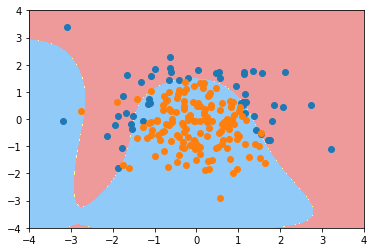

In [159]:
'''
可视化决策边界
'''
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
'''
绘制出样本点的坐标
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [167]:
'''
3.对PolynomialLogisticRegression的C进行模型的正则化
'''

def PolynomialLogisticRegression(degree,C):
    return Pipeline([
        #poly字符串描述函数功能，添加多项式实例化PolynomialFeatures对象
        ('poly',PolynomialFeatures(degree=degree)),
        #归一化
        ('std_scaler',StandardScaler()),
        
#         LogisticRegression为自定义实现的类，可以传到sklearn管道函数中
#         因为，自定义函数遵循了sklearn模块定义标准，要有构造函数，fit函数，predict函数，score函数
#         可以无缝连接        
        ('log_reg',LogisticRegression(C=C))
    ])

In [168]:
'''
C=0.1相当于让模型正则化的项L2起到更大的作用 
分类准确度的损失函数作用更小一些，C为分类准确度的损失函数的系数
'''
poly_log_reg3 = PolynomialLogisticRegression(degree=20,C=0.1)

In [170]:
'''
训练集的表现
'''
poly_log_reg3.fit(X_train,y_train)
poly_log_reg3.score(X_train,y_train)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.85333333333333339

In [171]:
'''
测试集的表现:
测试数据比较简单，可能效果不明显
但是可以看出使用C=0.1后，模型对未知模型的泛华能力没有降低
'''
poly_log_reg3.score(X_test,y_test)

0.92000000000000004

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


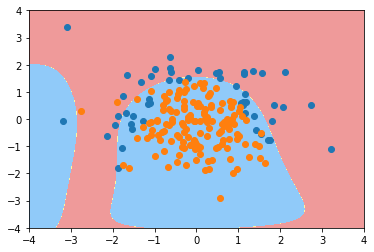

In [172]:
'''
可视化决策边界
'''
plot_decision_boundary(poly_log_reg3,axis=[-4,4,-4,4])
'''
绘制出样本点的坐标
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [174]:
'''
4.使用L1正则项
'''

def PolynomialLogisticRegression(degree,C,penalty):
    return Pipeline([
        #poly字符串描述函数功能，添加多项式实例化PolynomialFeatures对象
        ('poly',PolynomialFeatures(degree=degree)),
        #归一化
        ('std_scaler',StandardScaler()),
        
#         LogisticRegression为自定义实现的类，可以传到sklearn管道函数中
#         因为，自定义函数遵循了sklearn模块定义标准，要有构造函数，fit函数，predict函数，score函数
#         可以无缝连接        
        ('log_reg',LogisticRegression(C=C,penalty=penalty))
    ])

In [175]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20,C=0.1,penalty='l1')
poly_log_reg4.fit(X_train,y_train)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [178]:
poly_log_reg4.score(X_train,y_train)

0.82666666666666666

In [179]:
poly_log_reg4.score(X_test,y_test)

0.90000000000000002

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


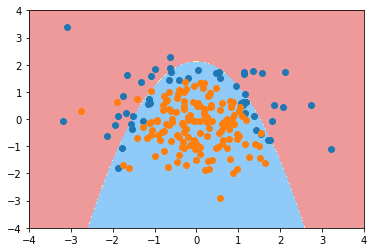

In [181]:
'''
可视化决策边界: 因为样本数据本身比较简单，所以此时主要观察决策边界图形的平滑度和简单度
使用正则化l1的方法，比l2图像更简单一些，不会出现多个分类区间的情况，即过拟合
'''
plot_decision_boundary(poly_log_reg4,axis=[-4,4,-4,4])
'''
绘制出样本点的坐标
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [ ]:
'''
说明：degree，C，l1还是l2都是超参数，需要使用网格搜索的方法找到最适合的超参数
'''

# 逻辑回归添加多项式特征，实现多分类

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
'''
对鸢尾花数据进行分类
'''

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [187]:
from playML.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,seed=666)

In [188]:
'''
1.对鸢尾花数据进行了多分类：默认为OVR的方式
'''
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [189]:

'''
对鸢尾花数据进行了多分类：默认为OVR的方式
'''
log_reg.score(X_test,y_test)

0.69999999999999996

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


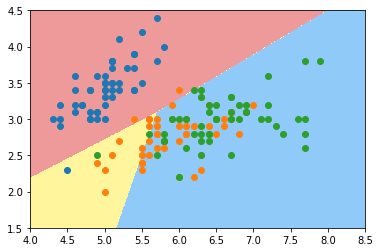

In [192]:
'''
可视化决策边界
'''
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5])
'''
绘制出样本点的坐标
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

'''
对鸢尾花数据进行了多分类：默认为OVR的方式
'''

In [193]:
'''
利用OVO多分类:需要传递特定参数
'''
log_reg2 = LogisticRegression(multi_class='multinomial',solver='newton-cg')
log_reg2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [194]:
log_reg2.score(X_test,y_test)

0.80000000000000004

C:\softwareInstall\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


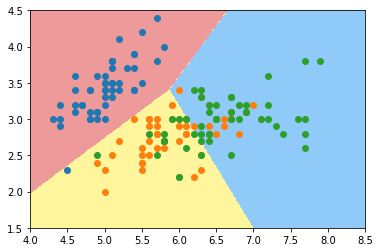

In [195]:
'''
2.可视化决策边界:可见OVO比OVR更加准确一些
'''
plot_decision_boundary(log_reg2,axis=[4,8.5,1.5,4.5])
'''
绘制出样本点的坐标
'''
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [197]:
'''
3.使用所有数据特征，而不是上面只是用两种特征，看一下结果
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
'''
对鸢尾花数据进行分类
'''

iris = datasets.load_iris()
X = iris.data
y = iris.target

from playML.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,seed=666)

In [198]:
log_regall = LogisticRegression()
log_regall.fit(X_train,y_train)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [200]:
log_regall.score(X_test,y_test)

0.93333333333333335

In [201]:
log_regall = LogisticRegression(multi_class='multinomial',solver='newton-cg')
log_regall.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [203]:
'''
使用OVO分类测试数据，准确率100%
'''
log_regall.score(X_test,y_test)

1.0

In [204]:
'''
4.针对多分类任务
sklearn 提供了 支持OVO，OVR这两个类

我们可以利用这两个类，实现任意二分类模型的多分类任务
'''
from sklearn.multiclass import OneVsRestClassifier

# 可以传进去一个二分类器 log_reg
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.93333333333333335

In [205]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train,y_train)
ovo.score(X_test,y_test)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0